## K - Nearest Neighbour Classification (using SKLearn)

In [1]:
#Required Libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split

#note sklearn.cross_validation is depreciated.

In [2]:
#DATA
#Setting the working directory
os.chdir("C:/Users/Gourab/Documents")
#Reading the data
iris = pd.read_csv("iris.csv")
iris.sample(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
117,118,7.7,3.8,6.7,2.2,virginica
19,20,5.1,3.8,1.5,0.3,setosa
81,82,5.5,2.4,3.7,1.0,versicolor
53,54,5.5,2.3,4.0,1.3,versicolor
0,1,5.1,3.5,1.4,0.2,setosa
132,133,6.4,2.8,5.6,2.2,virginica
72,73,6.3,2.5,4.9,1.5,versicolor
20,21,5.4,3.4,1.7,0.2,setosa
80,81,5.5,2.4,3.8,1.1,versicolor
33,34,5.5,4.2,1.4,0.2,setosa


In [3]:
X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
y = iris['Species']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 100)

In [5]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
#print accuracy_score(y_test, pred)

In [6]:
pred

array(['setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
#To create a confusion matrix
from sklearn.metrics import confusion_matrix

c = confusion_matrix(y_test, pred)
c

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]], dtype=int64)

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
#Using Cross-Validation to choose optimal k
# creating odd list of K for KNN
neighbors = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

In [14]:
cv_scores

[0.9700000000000001,
 0.9318181818181819,
 0.9518181818181819,
 0.941818181818182,
 0.9518181818181819,
 0.9618181818181819,
 0.9518181818181819,
 0.9618181818181819,
 0.9709090909090909,
 0.9618181818181819,
 0.9527272727272728,
 0.9427272727272727,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9618181818181819,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9618181818181819,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9527272727272728,
 0.9718181818181819,
 0.9627272727272727,
 0.9527272727272728,
 0.9527272727272728,
 0.9327272727272728,
 0.9527272727272728,
 0.9327272727272728,
 0.9327272727272728,
 0.9136363636363637,
 0.9136363636363637,
 0.9136363636363637,
 0.9227272727272728,
 0.9136363636363637,
 0.9327272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9227272727272728,
 0.9418181818181818,
 0.9227272727272728,
 0.9327272727272728,
 0.90454545454

In [12]:
import matplotlib.pyplot as plt

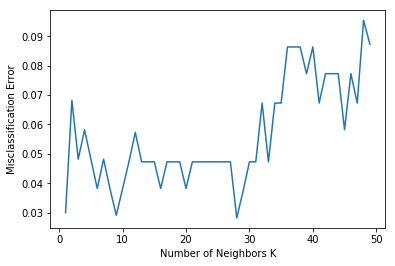

In [13]:
# changing to misclassification error (1 - accuracy)
MSE = [1 - x for x in cv_scores]


# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


